# Problem 1: Linear Regression

### Importing required libraries

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams.update({'font.size': 12})

## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [2]:
cz = pd.read_csv("cubic_zirconia.csv")

In [3]:
cz.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
cz.shape

(26967, 11)

In [5]:
cz.drop('Unnamed: 0',axis = 1, inplace=True)
cz.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
cz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
cz.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


### Checking for duplicates

In [8]:
dups = cz.duplicated()
dups.sum()

34

There are 33 duplicate rows. In this problem the attributes have very specific values, it is highly unlikely for 2 stones to have exact same dimensions and values, hence these duplicate rows would be dropped

### Unique values for categorical variables and their count

In [9]:
for column in cz.columns:
    if cz[column].dtype == 'object':
        print(column.upper(),': ',cz[column].nunique())
        print(cz[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




All the categorical values are correct and not null

## Univariate Analysis

### Checking for outliers

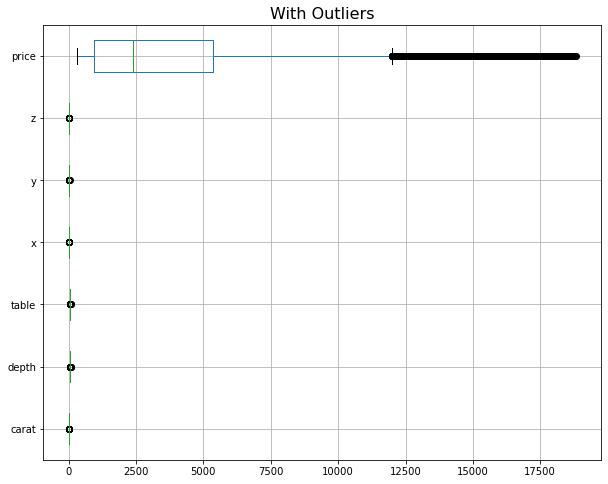

In [10]:
plt.figure(figsize=(10,8))
plt.title('With Outliers',fontsize=16)
cz.boxplot(vert=0)

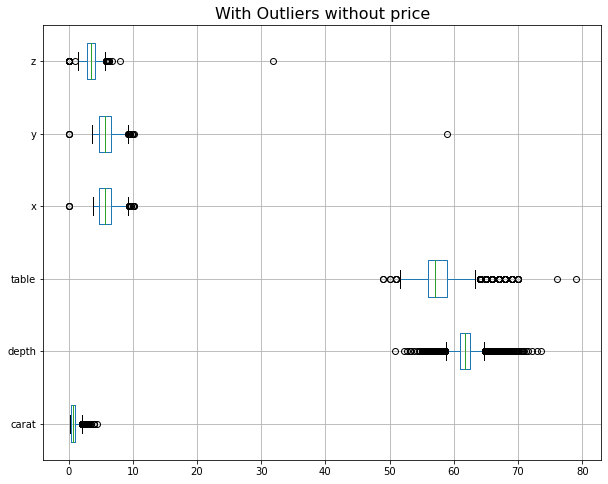

In [11]:
#Outliers without price variable
plt.figure(figsize=(10,8))
cz[['carat','depth','table','x', 'y', 'z','cut','color','clarity']].boxplot(vert=0)
plt.title('With Outliers without price',fontsize=16)
plt.show()

The columns are at different scales and contain outliers.

## Bivariate Analysis

### Checking the scatter plots using pairplot and correlation using heatmap for data with outliers

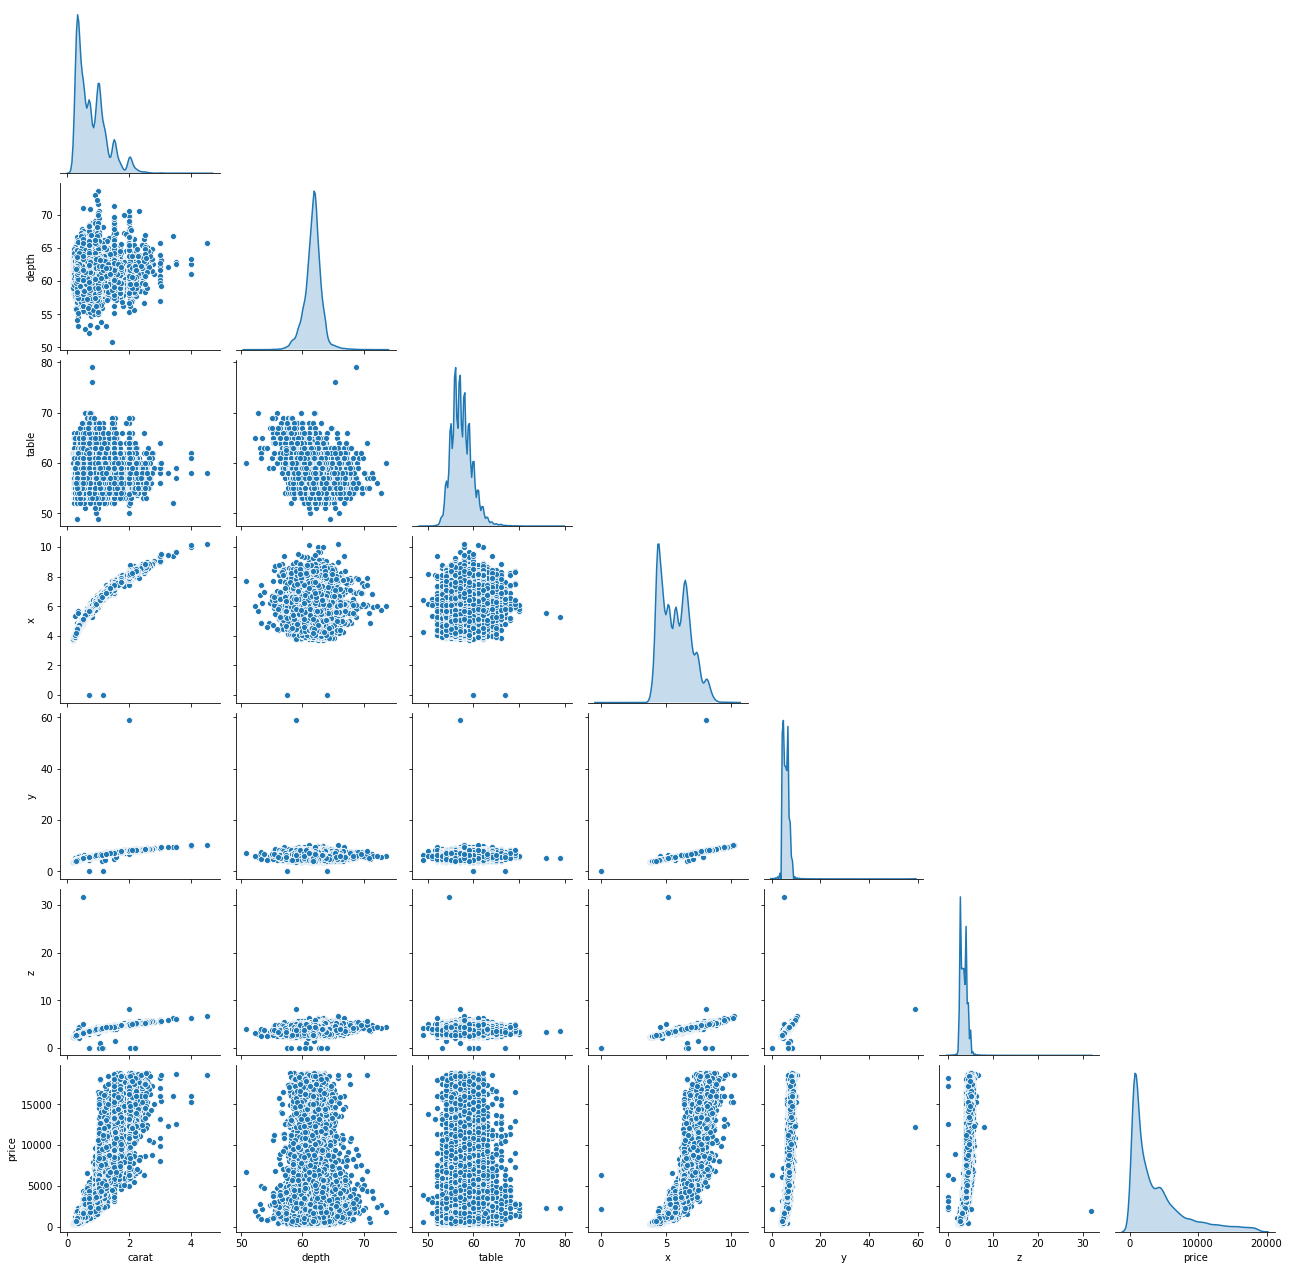

In [12]:
sns.pairplot(data=cz,corner = True, diag_kind="kde")
plt.rcParams.update({'font.size': 12})

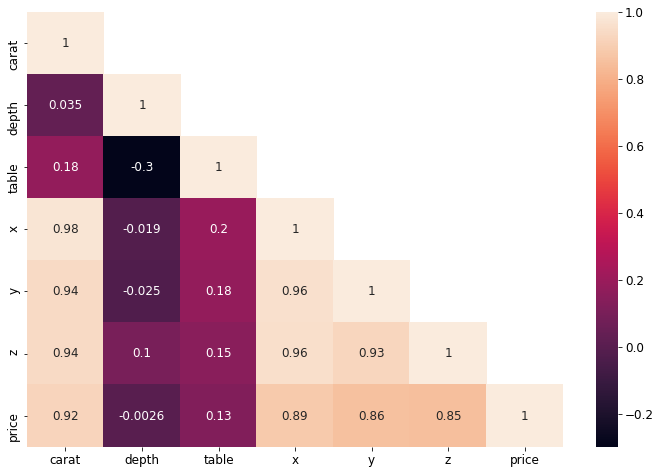

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(cz.corr(),annot=True,mask=np.triu(cz.corr(),+1))

### EDA

Text(0.5, 1.0, 'clarity')

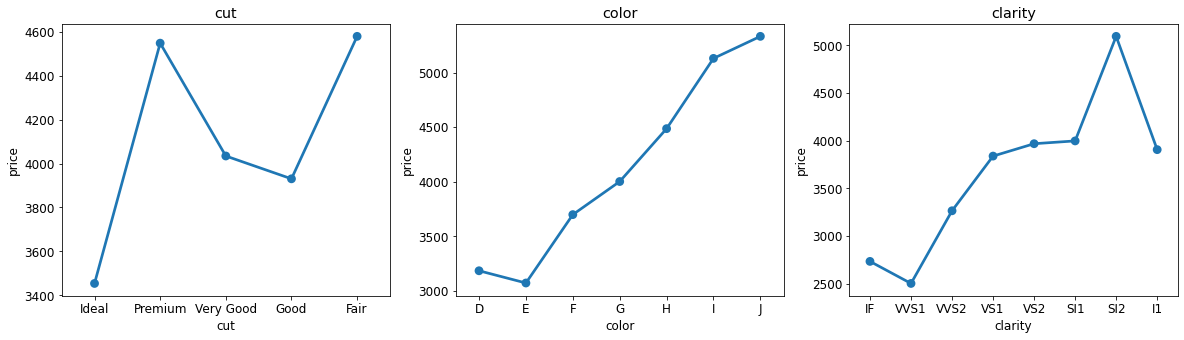

In [14]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
a = sns.pointplot('cut','price',data=cz,ci=False, order=["Ideal", "Premium","Very Good", "Good","Fair"])
a.set_title('cut')
plt.subplot(1,3,2)
a = sns.pointplot('color','price',data=cz,ci=False, order=["D", "E","F", "G","H", "I","J"])
a.set_title('color')
plt.subplot(1,3,3)
a = sns.pointplot('clarity','price',data=cz,ci=False, order=["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"])
a.set_title('clarity')

Text(0.5, 1.0, 'clarity')

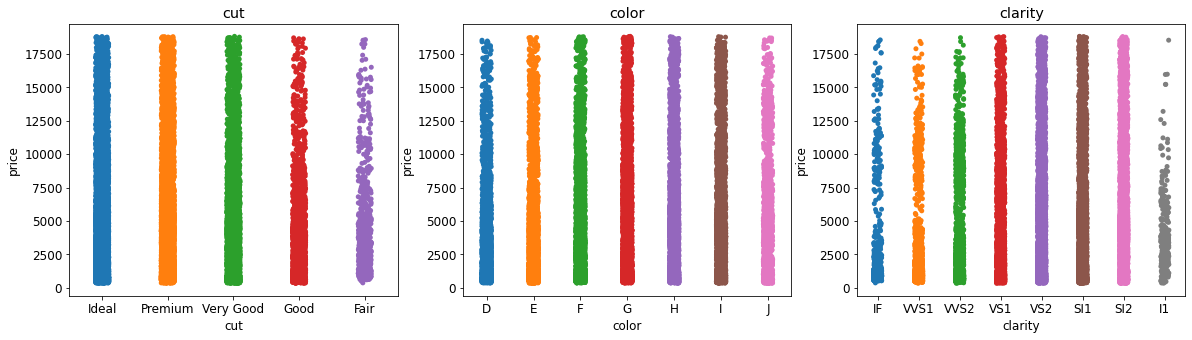

In [15]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
a = sns.stripplot('cut', 'price',data = cz,jitter=True,order=["Ideal", "Premium","Very Good", "Good","Fair"])
a.set_title('cut')
plt.subplot(1,3,2)
a = sns.stripplot('color','price',data=cz,jitter=True, order=["D", "E","F", "G","H", "I","J"])
a.set_title('color')
plt.subplot(1,3,3)
a = sns.stripplot('clarity','price',data=cz,jitter=True,order=["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"])
a.set_title('clarity')

Text(0.5, 1.0, 'clarity')

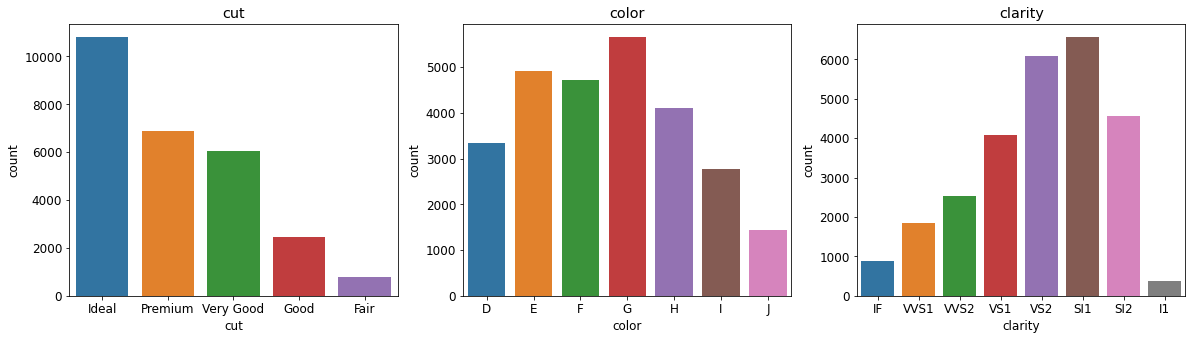

In [16]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
a = sns.countplot('cut', data = cz,order=["Ideal", "Premium","Very Good", "Good","Fair"])
a.set_title('cut')
plt.subplot(1,3,2)
a = sns.countplot('color',data=cz,order=["D", "E","F", "G","H", "I","J"])
a.set_title('color')
plt.subplot(1,3,3)
a = sns.countplot('clarity',data=cz,order=["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"])
a.set_title('clarity')

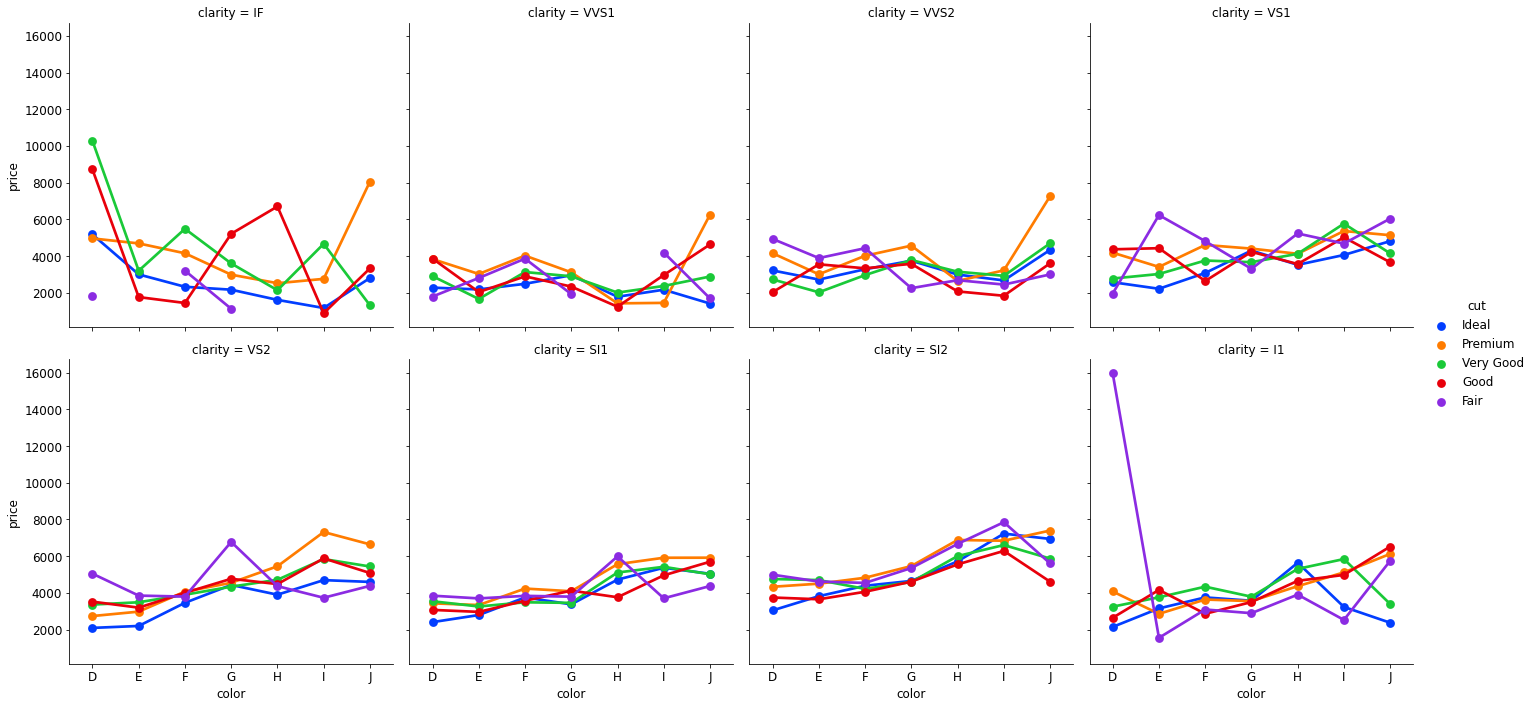

In [17]:
sns.factorplot(x= "color",y = "price",col= "clarity",col_wrap=4,hue = "cut", data=cz,kind="point", join = True,ci= False,palette='bright',aspect=1,order=["D", "E","F", "G","H", "I","J"],col_order = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"])

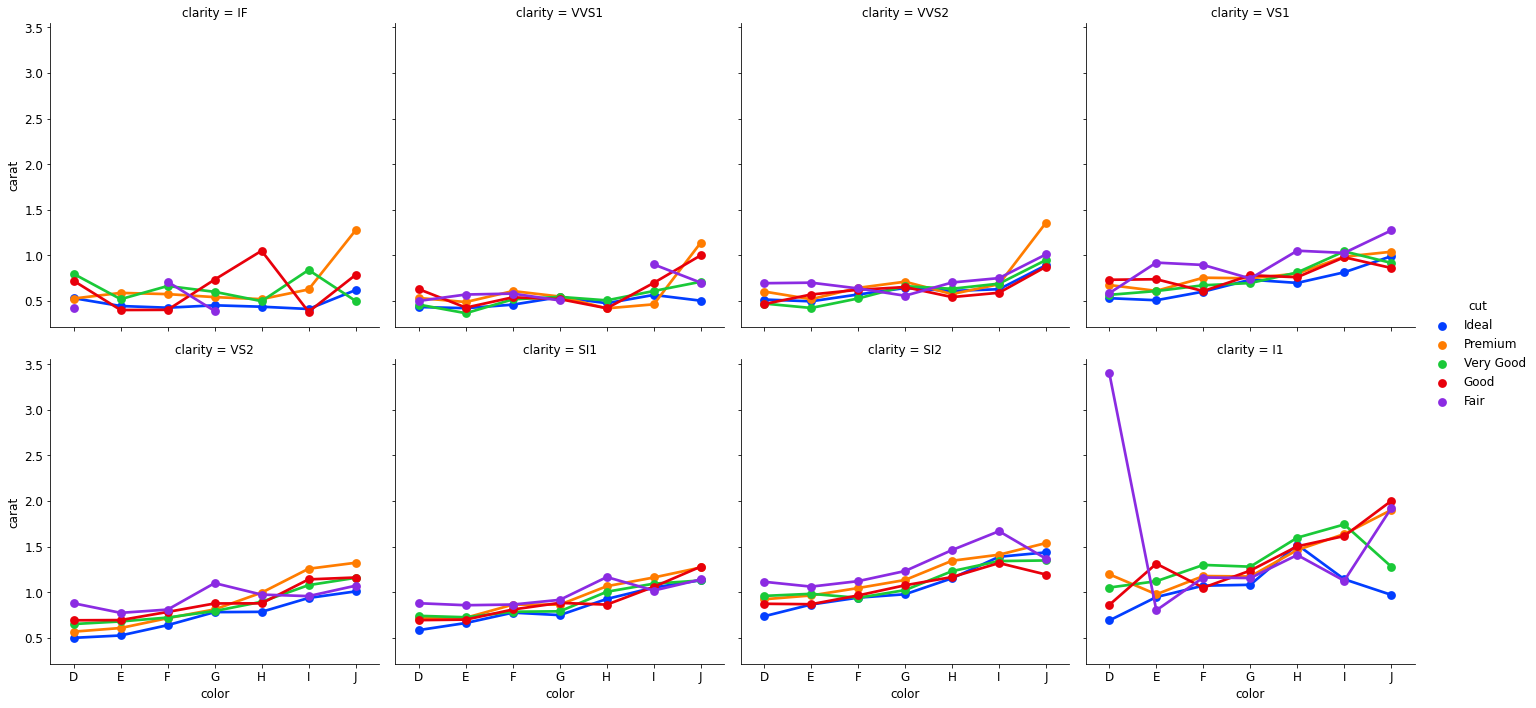

In [18]:
sns.factorplot(x= "color",y = "carat",col= "clarity",col_wrap=4,hue = "cut", data=cz,kind="point", join = True,ci= False,palette='bright',aspect=1,order=["D", "E","F", "G","H", "I","J"],col_order = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"])

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

### Treating Duplicates

In [19]:
print('Before',cz.shape)
cz.drop_duplicates(inplace=True) 
print('After',cz.shape)

Before (26967, 10)
After (26933, 10)


### Checking for null values and imputing them

In [20]:
cz.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

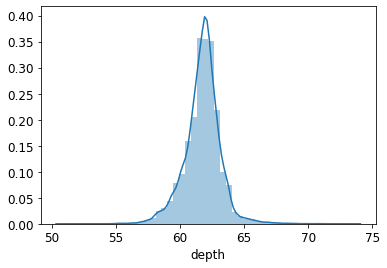

In [21]:
sns.distplot(cz['depth'])

Null values are only present in depth column and it is normally distributed as seen from above graph, hence we can impute the null values with mean of the column

In [22]:
cz['depth'].fillna(cz['depth'].mean(),inplace = True)    
#Checking for nulls again
cz.isnull().sum()        

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [23]:
#Checking shape again after imputing null values
cz.shape

(26933, 10)

In [24]:
# x,y,z have 0 as values
cz[(cz['x'] == 0) | (cz['y'] == 0) | (cz['z'] == 0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


The above rows have x, y and z dimensions as 0, which is not possible. We can either impute or drop these rows. Here I decided to drop them since they are in small number and their absence won't make much difference while building model

In [25]:
idx = cz[(cz['x'] == 0) | (cz['y'] == 0) | (cz['z'] == 0)].index
cz.drop(idx, inplace = True)

### Treatment of outliers (optional)

In [26]:
cz_no_outliers = cz.copy()

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
for column in cz_no_outliers.columns:
    if cz[column].dtype != 'object':
        lr,ur=remove_outlier(cz_no_outliers[column])
        cz_no_outliers[column]=np.where(cz_no_outliers[column]>ur,ur,cz_no_outliers[column])
        cz_no_outliers[column]=np.where(cz_no_outliers[column]<lr,lr,cz_no_outliers[column])

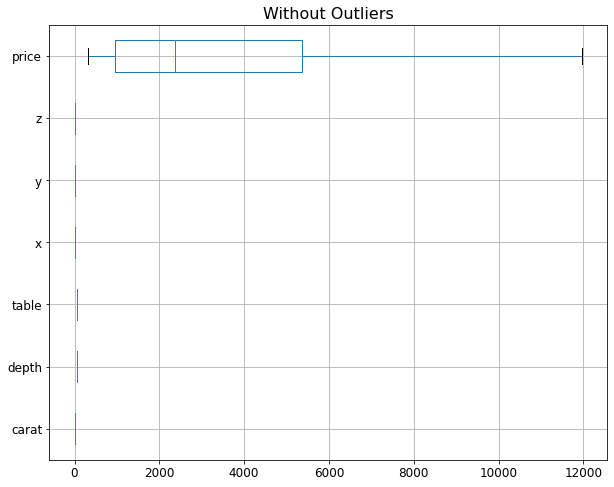

In [29]:
plt.figure(figsize=(10,8))
plt.title('Without Outliers',fontsize=16)
cz_no_outliers.boxplot(vert=0)

## Checking the scatter plots using pairplot and correlation using heatmap for preprocessed data without outliers

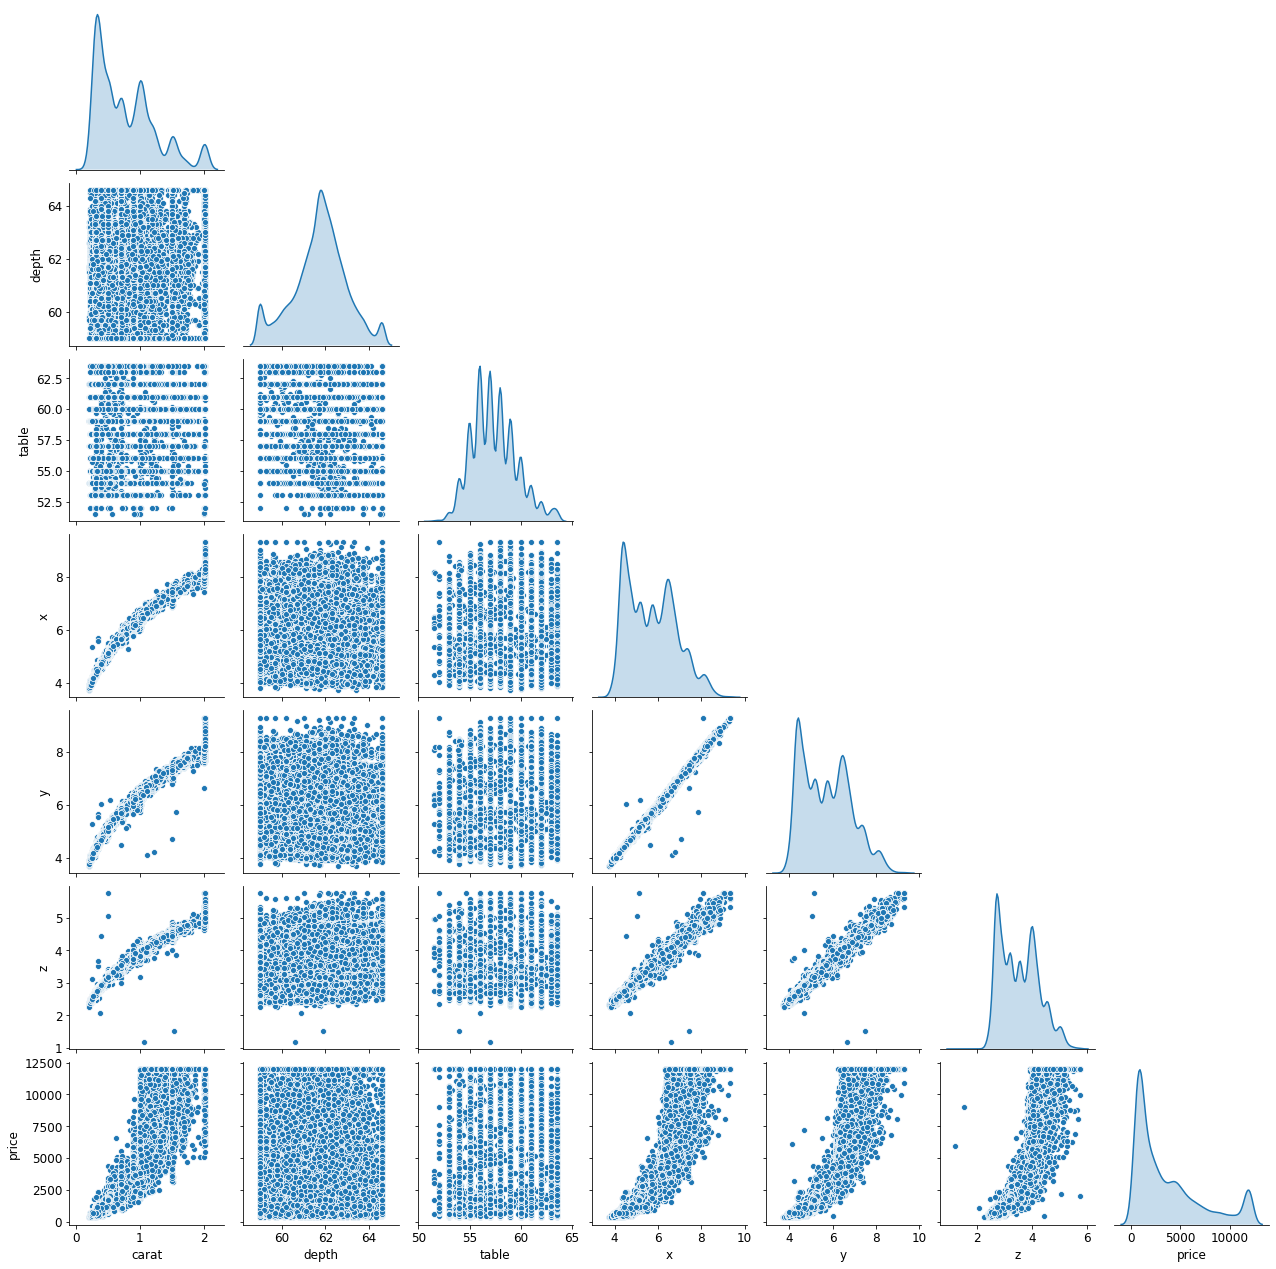

In [30]:
sns.pairplot(data=cz_no_outliers,corner = True, diag_kind="kde")

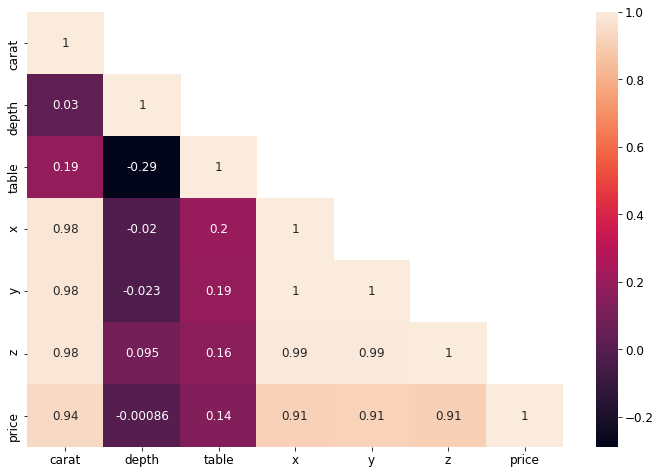

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(cz_no_outliers.corr(),annot=True,mask=np.triu(cz.corr(),+1))

## 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

### Encoding the categorical columns which are ordinal in nature

In [32]:
order_mapper = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5,'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1,'FL': 11, 'IF': 10, 'VVS1': 9, 'VVS2': 8, 'VS1': 7, 'VS2': 6, 'SI1': 5, 'SI2': 4, 'I1': 3, 'I2': 2, 'I3': 1}
cat_cols = ['cut','color','clarity']
for i in cat_cols:
    cz[i] = cz[i].replace(order_mapper)
    cz_no_outliers[i] = cz_no_outliers[i].replace(order_mapper)

In [33]:
cz.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,6,5,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,10,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,6,8,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,5,7,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,5,9,60.4,59.0,4.35,4.43,2.65,779


In [34]:
cz.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000
mean,0.797821,3.909861,4.395023,6.054039,61.745566,57.455305,5.729385,5.733152,3.538820,3936.249991
std,0.477085,1.113127,1.706043,1.646618,1.393430,2.231327,1.126081,1.163820,0.717483,4020.983187
min,0.200000,1.000000,1.000000,3.000000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,3.000000,3.000000,5.000000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,4.000000,4.000000,6.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,5.000000,6.000000,7.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5353.000000
max,4.500000,5.000000,7.000000,10.000000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### Train Test Split for Models

**Model using scaled data**

In [35]:
# Copy all the predictor variables into X dataframe
X = cz.drop('price', axis=1) #cz_no_outliers

# Copy target into the y dataframe. 
y = cz[['price']]

In [36]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [37]:
# Checking dimensions on the train and test data
print('x_train: ',X_train.shape)
print('x_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (18847, 9)
x_test:  (8078, 9)
y_train:  (18847, 1)
y_test:  (8078, 1)


In [38]:
#Scaling data using StandardScaler
sc = StandardScaler() 
X_trains=sc.fit_transform(X_train.values)
X_train_scaled = pd.DataFrame(X_trains, index=X_train.index, columns=X_train.columns)
X_tests=sc.transform(X_test.values)
X_test_scaled = pd.DataFrame(X_tests, index=X_test.index, columns=X_test.columns)
y_trains=sc.fit_transform(y_train.values)
y_train_scaled = pd.DataFrame(y_trains, index=y_train.index, columns=y_train.columns)
y_tests=sc.transform(y_test.values)
y_test_scaled = pd.DataFrame(y_tests, index=y_test.index, columns=y_test.columns)

In [39]:
regression_model_scaled = LinearRegression()
regression_model_scaled.fit(X_train_scaled, y_train_scaled)

LinearRegression()

**Model using using scaled data without outliers**

In [40]:
# Copy all the predictor variables into X dataframe
X_new = cz_no_outliers.drop('price', axis=1) #cz_no_outliers

# Copy target into the y dataframe. 
y_new = cz_no_outliers[['price']]

In [41]:
# Split X and y into training and test set in 70:30 ratio
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.30 , random_state=1)

In [42]:
#Scaling data using StandardScaler
sc = StandardScaler() 
X_trains_new = sc.fit_transform(X_train_new.values)
X_train_scaled_new = pd.DataFrame(X_trains_new, index=X_train_new.index, columns=X_train_new.columns)
X_tests_new = sc.transform(X_test_new.values)
X_test_scaled_new = pd.DataFrame(X_tests_new, index=X_test_new.index, columns=X_test_new.columns)
y_trains_new = sc.fit_transform(y_train_new.values)
y_train_scaled_new = pd.DataFrame(y_trains_new, index=y_train_new.index, columns=y_train_new.columns)
y_tests_new = sc.transform(y_test_new.values)
y_test_scaled_new = pd.DataFrame(y_tests_new, index=y_test_new.index, columns=y_test_new.columns)

### Building Models

In [43]:
regression_model_scaled = LinearRegression()
regression_model_scaled_outlier = LinearRegression()

models=[regression_model_scaled,regression_model_scaled_outlier]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
intercept=[]

for i in models:     
    if (i == regression_model_scaled):
        i.fit(X_train_scaled, y_train_scaled)
        scores_train.append(i.score(X_train_scaled, y_train_scaled))
        scores_test.append(i.score(X_test_scaled, y_test_scaled))   
        rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train,sc.inverse_transform(i.predict(X_train_scaled)))))
        rmse_test.append(np.sqrt(metrics.mean_squared_error(y_test,sc.inverse_transform(i.predict(X_test_scaled)))))
        intercept.append(i.intercept_[0])      
        
    elif (i == regression_model_scaled_outlier):
        i.fit(X_train_scaled_new, y_train_scaled_new)
        scores_train.append(i.score(X_train_scaled_new, y_train_scaled_new))
        scores_test.append(i.score(X_test_scaled_new, y_test_scaled_new))
        rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train,sc.inverse_transform(i.predict(X_train_scaled_new)))))
        rmse_test.append(np.sqrt(metrics.mean_squared_error(y_test,sc.inverse_transform(i.predict(X_test_scaled_new)))))      
        intercept.append(i.intercept_[0]) 

### Performance Metrics
**RMSE and Rsquare**

In [44]:
pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test,'Intercept': intercept},
            index=['LR Scaled','LR Scaled No Outliers'])

,Train RMSE,Test RMSE,Training Score,Test Score,Intercept
LR Scaled,1338.859495,1340.982274,0.907986,0.909617,-4.214368e-16
LR Scaled No Outliers,1306.255659,1307.101819,0.931228,0.931626,-7.075815e-16


**Coefficients**

In [45]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_scaled.coef_[0][idx]))

The coefficient for carat is 1.3099588686405166
The coefficient for cut is 0.029799671270946054
The coefficient for color is 0.1401460998170963
The coefficient for clarity is 0.206917156269068
The coefficient for depth is -0.02940543098537138
The coefficient for table is -0.019844238089306052
The coefficient for x is -0.2664397007455609
The coefficient for y is 0.00196305946650607
The coefficient for z is -0.007614450623715882


In [46]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train_scaled_new.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_scaled_outlier.coef_[0][idx]))

The coefficient for carat is 1.1818293465715088
The coefficient for cut is 0.03644990837508301
The coefficient for color is 0.1346403989039474
The coefficient for clarity is 0.20831346938159903
The coefficient for depth is 0.012439216453969093
The coefficient for table is -0.009404639726277733
The coefficient for x is -0.4373911366880155
The coefficient for y is 0.5026951952694957
The coefficient for z is -0.1941236723474048


## Linear Regression using statsmodels
### Building model using scaled data

In [47]:
data_train_scaled = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_test_scaled=pd.concat([X_test_scaled,y_test_scaled],axis=1)
data_train_scaled_new = pd.concat([X_train_scaled_new, y_train_scaled_new], axis=1)
data_test_scaled_new = pd.concat([X_test_scaled_new,y_test_scaled_new],axis=1)

In [48]:
expr = 'price ~ carat + cut + color + clarity + depth + table + x + y + z'

In [49]:
lm2 = smf.ols(formula= expr, data = data_train_scaled).fit()
lm2.params

Intercept   -1.988156e-17
carat        1.309959e+00
cut          2.979967e-02
color        1.401461e-01
clarity      2.069172e-01
depth       -2.940543e-02
table       -1.984424e-02
x           -2.664397e-01
y            1.963059e-03
z           -7.614451e-03
dtype: float64

In [50]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.065e+04
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:02:36   Log-Likelihood:                -4260.0
No. Observations:               18847   AIC:                             8540.
Df Residuals:                   18837   BIC:                             8618.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.988e-17      0.002     -9e-15      1.0

### Building model using scaled data without outliers

In [51]:
lm3 = smf.ols(formula= expr, data = data_train_scaled_new).fit()
lm3.params

Intercept   -1.504331e-18
carat        1.181829e+00
cut          3.644991e-02
color        1.346404e-01
clarity      2.083135e-01
depth        1.243922e-02
table       -9.404640e-03
x           -4.373911e-01
y            5.026952e-01
z           -1.941237e-01
dtype: float64

In [52]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.834e+04
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:02:36   Log-Likelihood:                -1516.4
No. Observations:               18847   AIC:                             3053.
Df Residuals:                   18837   BIC:                             3131.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.504e-18      0.002  -7.87e-16      1.0

### Building model with volume column and removing x, y and z dimensions

In [53]:
data_test_scaled_new['Volume'] = data_test_scaled_new['x'] * data_test_scaled_new['y'] * data_test_scaled_new['z']
data_test_scaled_new1 = data_test_scaled_new.drop(['x','y','z'],axis=1)
expr1 = 'price ~ carat + cut + color + clarity + depth + table + Volume'
lm4 = smf.ols(formula= expr1, data = data_test_scaled_new1).fit()
lm4.params

Intercept    0.011328
carat        1.117256
cut          0.032158
color        0.134340
clarity      0.210064
depth       -0.010579
table       -0.010178
Volume      -0.027663
dtype: float64

In [54]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:02:36   Log-Likelihood:                -643.40
No. Observations:                8078   AIC:                             1303.
Df Residuals:                    8070   BIC:                             1359.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0113      0.003      3.761      0.0

In [55]:
vif = [variance_inflation_factor(data_test_scaled_new1.values, ix) for ix in range(data_test_scaled_new1.shape[1])] 
i=0
for column in data_test_scaled_new1.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 22.274831322086193
cut ---> 1.5108124515736878
color ---> 1.3824670658296658
clarity ---> 1.8356513394505538
depth ---> 1.329945344253522
table ---> 1.5824844977856332
price ---> 14.765892395229711
Volume ---> 3.463087656812612


Text(0.5, 1.0, 'Scaled data without outliers')

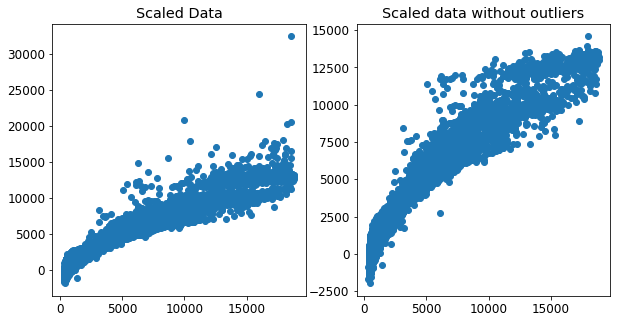

In [56]:
plt.figure(figsize= (10,5))
plt.subplot(1,2,1)
plt.scatter(y_test['price'],sc.inverse_transform(regression_model_scaled.predict(X_test_scaled)))
plt.title('Scaled Data')
plt.subplot(1,2,2)
plt.scatter(y_test['price'],sc.inverse_transform(regression_model_scaled_outlier.predict(X_test_scaled_new)))
plt.title('Scaled data without outliers')

## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

In [57]:
for i,j in np.array(lm4.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.01) * Intercept + (1.12) * carat + (0.03) * cut + (0.13) * color + (0.21) * clarity + (-0.01) * depth + (-0.01) * table + (-0.03) * Volume + 

# Problem 2: Logistic Regression and LDA

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [59]:
tour = pd.read_csv("Holiday_Package.csv")

In [60]:
tour.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [61]:
tour = tour.drop('Unnamed: 0',axis = 1)
tour.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [62]:
tour.shape

(872, 7)

In [63]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [64]:
tour.describe(include='all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


### Check for Missing values

In [65]:
tour.isnull().values.any()

False

### Checking unique category values and their count

In [66]:
for column in tour.columns:
    print(column.upper(),': ',tour[column].nunique())
    print(tour[column].value_counts().sort_values())
    print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


SALARY :  864
53846    1
51077    1
36800    1
36855    1
67573    1
        ..
44280    2
40270    2
46195    2
33357    2
39460    2
Name: Salary, Length: 864, dtype: int64


AGE :  43
62     3
61     8
20     8
22     9
60    10
53    10
23    11
21    12
52    13
59    14
54    14
58    16
24    16
55    17
25    17
57    18
56    18
30    19
29    19
27    19
48    20
37    21
43    21
50    21
51    22
45    23
49    23
42    24
46    24
26    24
39    25
47    26
41    26
32    27
36    28
38    28
40    29
28    29
33    30
35    31
34    32
31    32
44    35
Name: age, dtype: int64


EDUC :  20
1       1
21      1
18      1
19      2
17      3
2       6
16     10
3      11
15     15
6      21
14     25
7      31
13     43
4      50
5      67
10     90
11    100
9     114
12    124
8     157
Name: educ, dtype: int64


NO_YOUNG_CHILDREN :  4
3      5
2     55
1    147
0    665
Name: no_young_child

### Proportion of target variable

In [67]:
tour.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [68]:
tour.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

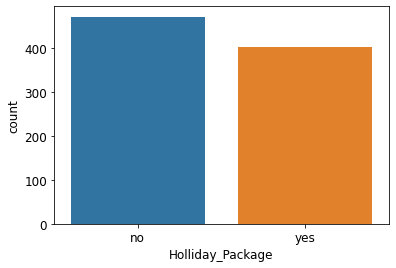

In [69]:
sns.countplot(tour.Holliday_Package)

### Checking Duplicate values

In [70]:
dups = tour.duplicated()
dups.sum()

0

## Univariate Analysis

### Checking outliers with boxplots

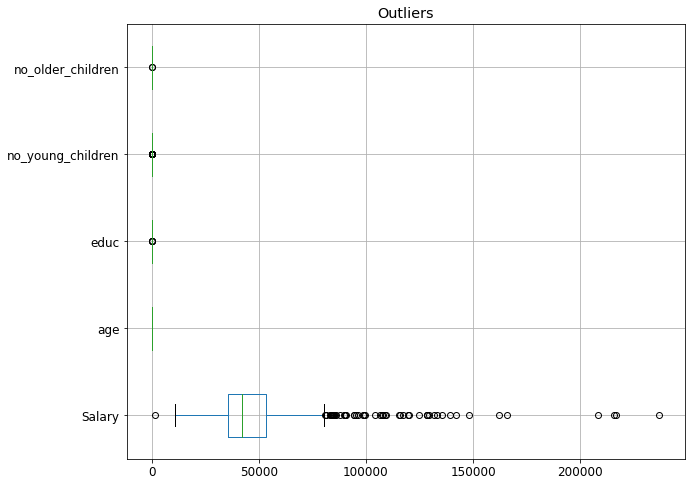

In [71]:
plt.figure(figsize=(10,8))
plt.title('Outliers')
tour.boxplot(vert=0)

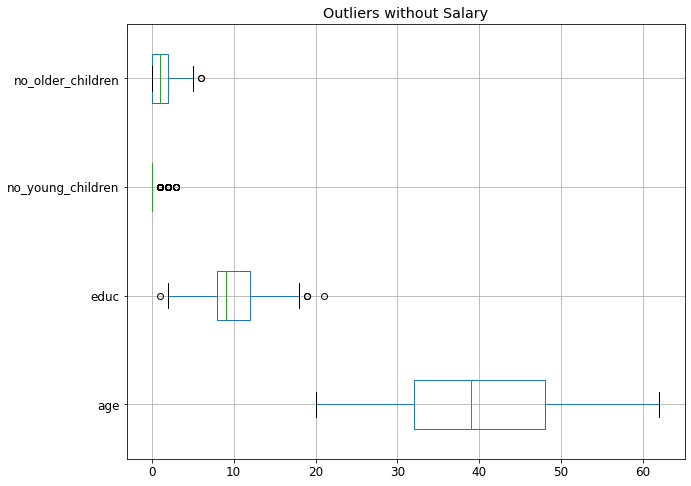

In [72]:
plt.figure(figsize=(10,8))
tour[[ 'age', 'educ', 'no_young_children','no_older_children']].boxplot(vert=0)
plt.title('Outliers without Salary')
plt.show()

In [73]:
Q1 = tour.quantile(0.25)
Q3 = tour.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)

In [74]:
((tour < (lower_range)) | (tour > (upper_range))).sum()

Holliday_Package       0
Salary                57
age                    0
educ                   4
foreign                0
no_older_children      2
no_young_children    207
dtype: int64

## Bivariate Analysis

### Checking Distribution of target variables wrt independent variables using pairplot

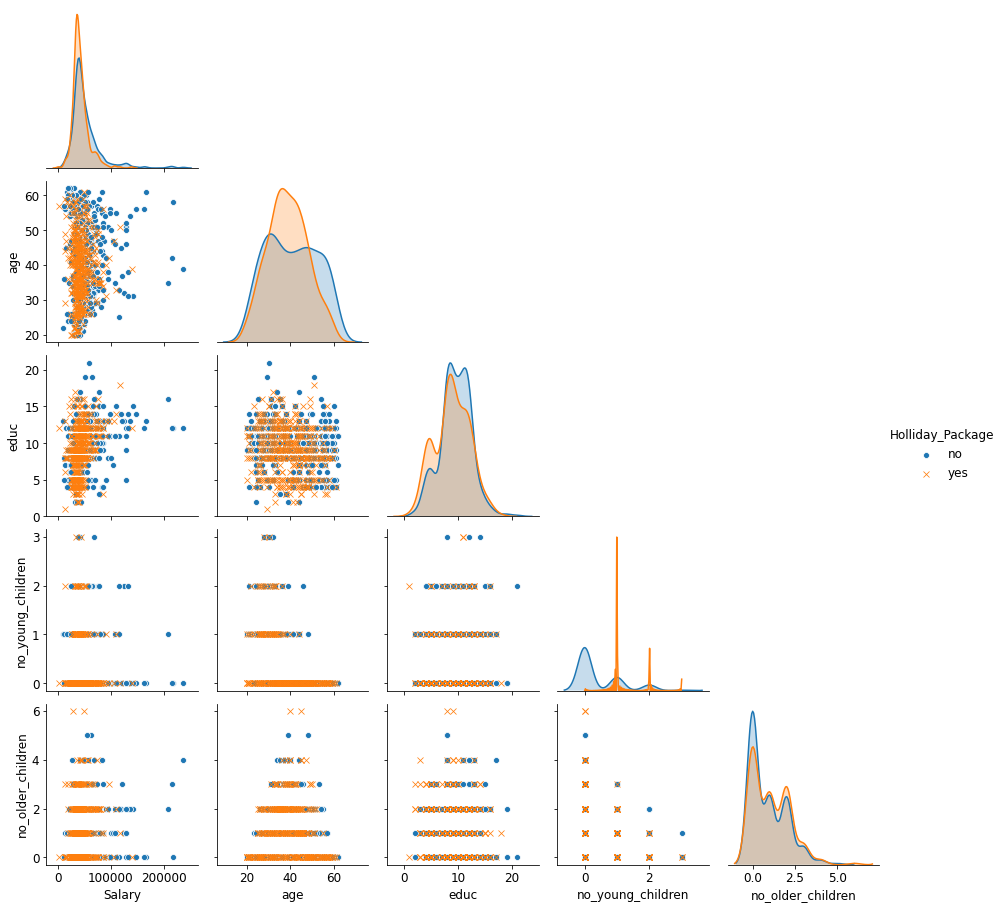

In [75]:
sns.pairplot(data=tour,corner=True,hue='Holliday_Package',markers=["o", "x"])

### Correlation Plot

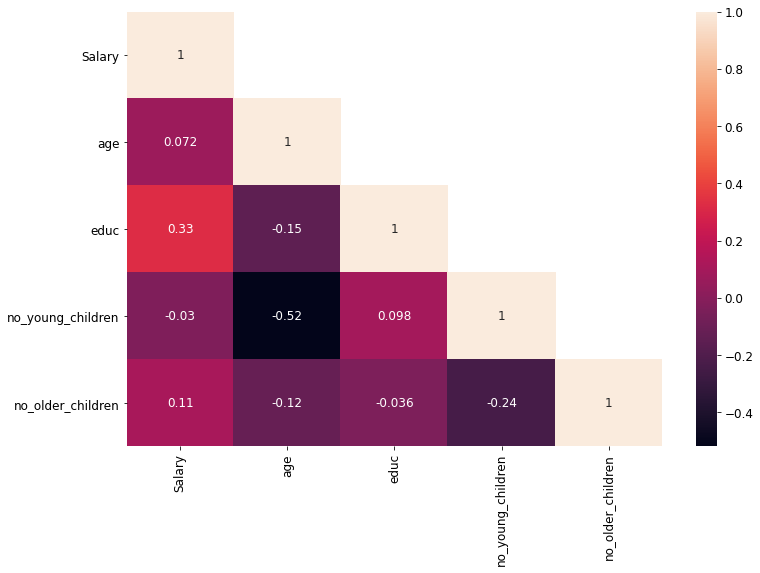

In [76]:
plt.figure(figsize=(12,8))
sns.heatmap(tour.corr(),annot=True,mask=np.triu(tour.corr(),+1))

## EDA

In [77]:
tour['Total_Children'] = tour['no_young_children'] + tour['no_older_children']
tour.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign,Total_Children
0,no,48412,30,8,1,1,no,2
1,yes,37207,45,8,0,1,no,1
2,no,58022,46,9,0,0,no,0
3,no,66503,31,11,2,0,no,2
4,no,66734,44,12,0,2,no,2


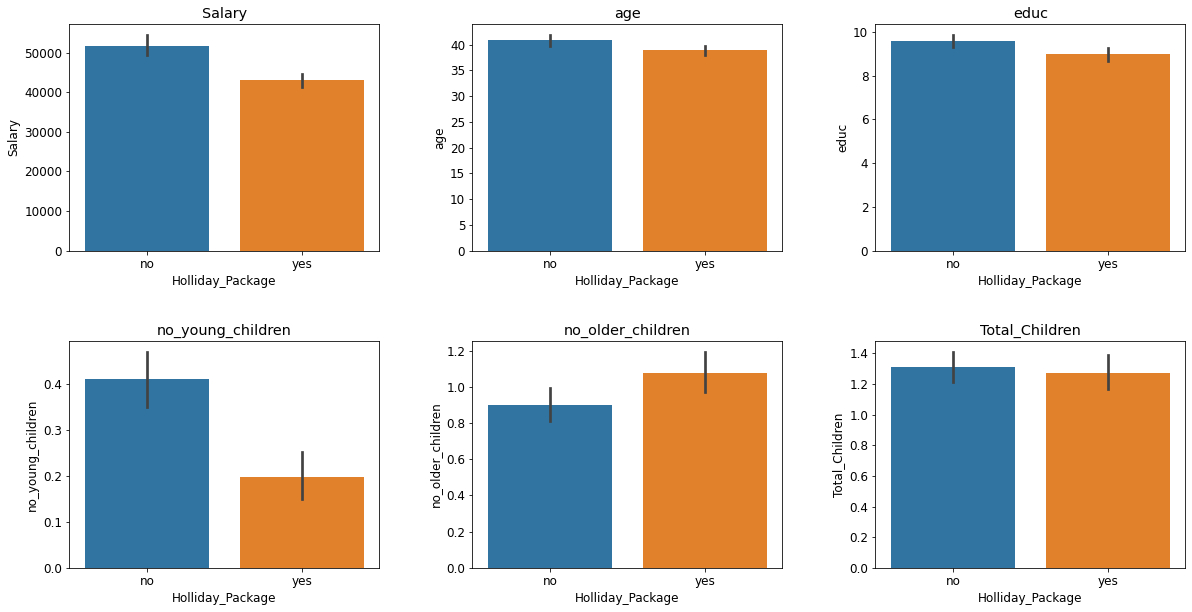

In [78]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs = axs.ravel()
col = ['Salary', 'age', 'educ', 'no_young_children','no_older_children', 'Total_Children']
for i in range(6):
    sns.barplot('Holliday_Package',col[i],data=tour,ax=axs[i])
    axs[i].set_title(col[i])

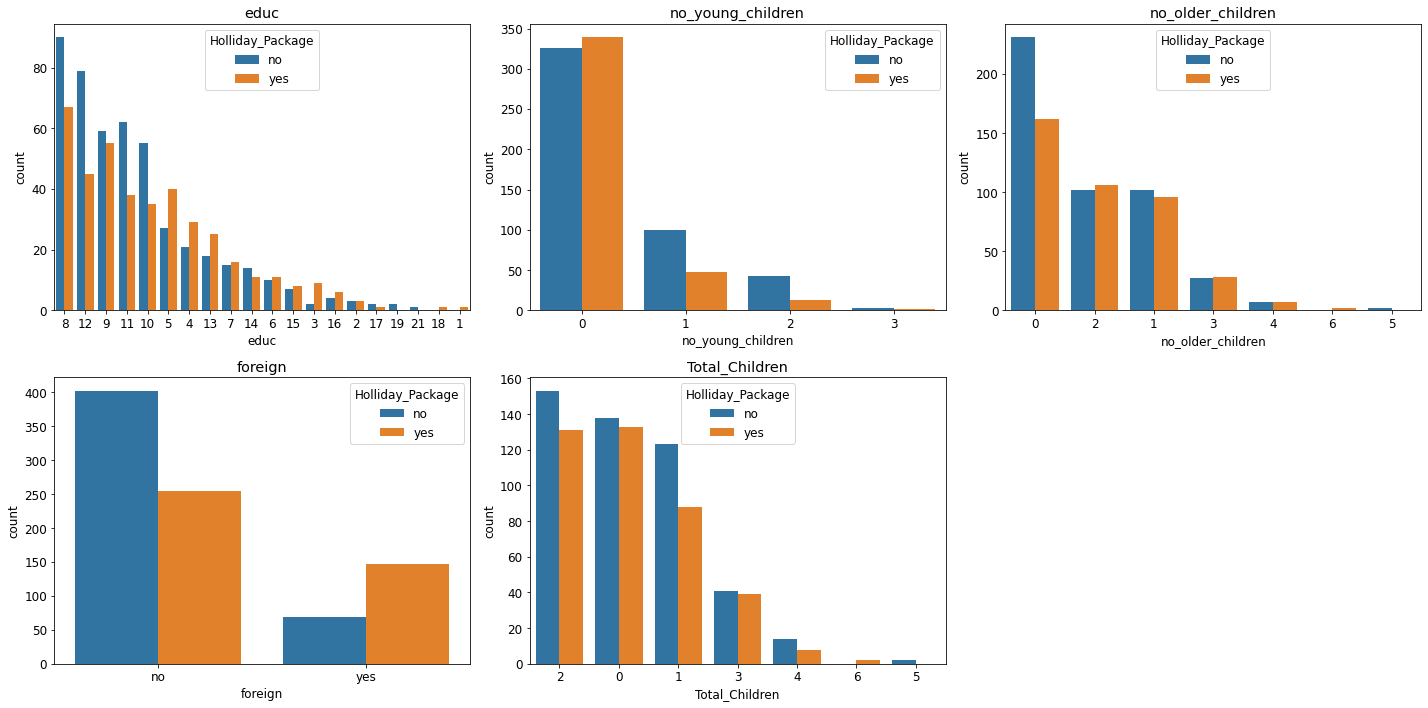

In [79]:
data_plot=tour[['educ','no_young_children','no_older_children','foreign','Total_Children']]
fig=plt.figure(figsize=(20,10))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,3,i+1).set_title(data_plot.columns[i])
    sns.countplot(data_plot[data_plot.columns[i]],hue = tour['Holliday_Package'],order = tour[data_plot.columns[i]].value_counts().index)
    plt.tight_layout()

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

### Encoding categorical data

In [80]:
#Label encoding target variable
tour['Holliday_Package'] = pd.Categorical(tour['Holliday_Package']).codes
# Dummy Variable Encoding
tour = pd.get_dummies(tour, columns=['foreign'],drop_first=True)

In [81]:
tour.drop('Total_Children',axis=1,inplace=True)
tour.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


### Splitting for train and test set

In [82]:
# Copy all the predictor variables into X dataframe
X = tour.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = tour['Holliday_Package']

In [83]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [84]:
# Checking dimensions on the train and test data
print('x_train: ',X_train.shape)
print('x_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (610, 6)
x_test:  (262, 6)
y_train:  (610,)
y_test:  (262,)


###  Logistic Regression Model

In [85]:
# Fit the Logistic Regression model
model = LogisticRegression(random_state = 1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [86]:
# Predicting on Training and Test dataset
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

#Accuracy of Model
print("Accuracy of training data: ",model.score(X_train, y_train))
print("Accuracy of test data: ",model.score(X_test, y_test))

Accuracy of training data:  0.5393442622950819
Accuracy of test data:  0.5419847328244275


### Applying GridSearchCV for Logistic Regression
Hypertuning the model parameters to improve model performance

In [87]:
#Hypertuning model parameters
grid={'penalty':['l2','none','l1'],
    'solver':['liblinear','lbfgs','sag','saga','newton-cg'],
      'tol':[0.0001,0.00001],
     'multi_class':['ovr','multinomial'] }

In [88]:
model_grid = LogisticRegression(max_iter=10000,n_jobs=2)

In [89]:
grid_search = GridSearchCV(estimator = model_grid, param_grid = grid, cv = 5, n_jobs=-1,scoring='f1')

In [90]:
# Fit the Logistic Regression model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l2', 'none', 'l1'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [91]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'multi_class': 'ovr', 'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, multi_class='ovr', n_jobs=2, penalty='none',
                   solver='newton-cg')


In [92]:
best_model = grid_search.best_estimator_

In [93]:
# Prediction
ytrain_predict_grid = best_model.predict(X_train)
ytest_predict_grid = best_model.predict(X_test)

# Probability Prediction
pred_prob_train_grid = best_model.predict_proba(X_train)
pred_prob_test_grid = best_model.predict_proba(X_test)

# Accuracy of Model
LR_train_acc = best_model.score(X_train, y_train)
LR_test_acc = best_model.score(X_test, y_test)
print("Accuracy of training data: ",LR_train_acc)
print("Accuracy of test data: ",LR_test_acc)

Accuracy of training data:  0.6672131147540984
Accuracy of test data:  0.6526717557251909


The hypertuned model accuracy is much better than base model, hence this would be used for further analysis and model building

### LDA (linear discriminant analysis) Model

In [94]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model_clf=clf.fit(X_train,y_train)

In [95]:
# Prediction
pred_class_train = model_clf.predict(X_train)
pred_class_test = model_clf.predict(X_test)

# Probability Prediction
pred_prob_train_LDA = model_clf.predict_proba(X_train)
pred_prob_test_LDA = model_clf.predict_proba(X_test)

# Accuracy of Model
LDA_train_acc = model_clf.score(X_train, y_train)
LDA_test_acc = model_clf.score(X_test, y_test)
print("Accuracy of training data: ",LDA_train_acc)
print("Accuracy of test data: ",LDA_test_acc)

Accuracy of training data:  0.6639344262295082
Accuracy of test data:  0.6412213740458015


## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Model Evaluation for Logistic Regression Model
**Classification Report for train and test set**

In [96]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, ytrain_predict_grid),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, ytest_predict_grid),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



In [97]:
LR_metrics_train=classification_report(y_train, ytrain_predict_grid,output_dict=True)
LR_df_train=pd.DataFrame(LR_metrics_train).transpose()
LR_train_precision=round(LR_df_train.loc["1"][0],2)
LR_train_recall=round(LR_df_train.loc["1"][1],2)
LR_train_f1=round(LR_df_train.loc["1"][2],2)
LR_metrics_test=classification_report(y_test, ytest_predict_grid,output_dict=True)
LR_df_test=pd.DataFrame(LR_metrics_test).transpose()
LR_test_precision=round(LR_df_test.loc["1"][0],2)
LR_test_recall=round(LR_df_test.loc["1"][1],2)
LR_test_f1=round(LR_df_test.loc["1"][2],2)

**Confusion matrix for train and test set**

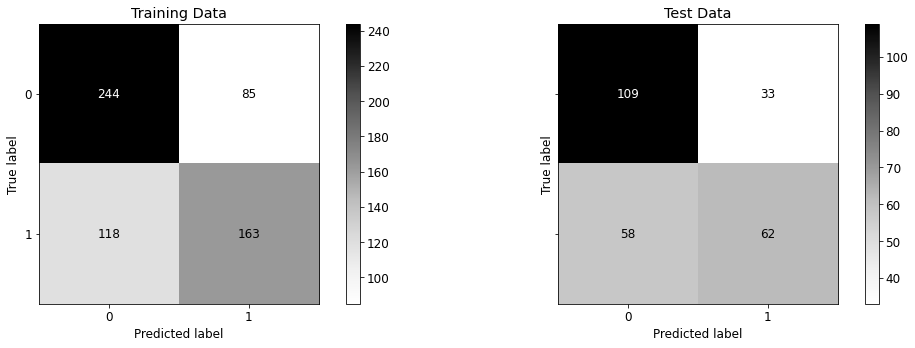

In [98]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,5))

#Plotting confusion matrix for training and test data
plot_confusion_matrix(best_model,X_train,y_train,ax=a[0][0],cmap='Greys');
a[0][0].set_title('Training Data')

plot_confusion_matrix(best_model,X_test,y_test,ax=a[0][1],cmap='Greys');
a[0][1].set_title('Test Data');
plt.tight_layout()  
plt.show()

**AUC and ROC curve for train and test set**

AUC for the Training Data: 0.735
AUC for the Test Data: 0.717


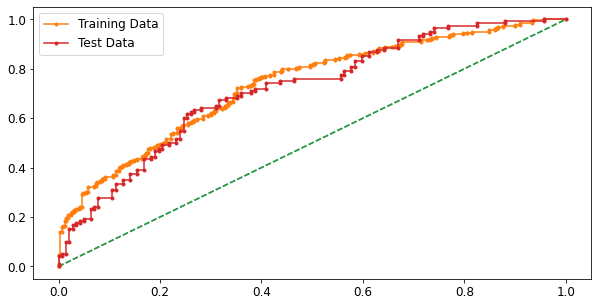

In [99]:
# AUC and ROC curve for the training data
plt.figure(figsize = (10,5))

# calculate AUC
LR_train_auc = metrics.roc_auc_score(y_train,pred_prob_train_grid[:,1])
print('AUC for the Training Data: %.3f' % LR_train_auc)

#  calculate roc curve
LR_train_fpr, LR_train_tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_grid[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_train_fpr, LR_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC curve for the test data

# calculate AUC
LR_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_grid[:,1])
print('AUC for the Test Data: %.3f' % LR_test_auc)

#  calculate roc curve
LR_test_fpr, LR_test_tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_grid[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_test_fpr, LR_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Model Evaluation for LDA Model
**Classification Report for train and test set**

In [100]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



In [101]:
LDA_metrics_train=classification_report(y_train, pred_class_train,output_dict=True)
LDA_df_train=pd.DataFrame(LDA_metrics_train).transpose()
LDA_train_precision=round(LDA_df_train.loc["1"][0],2)
LDA_train_recall=round(LDA_df_train.loc["1"][1],2)
LDA_train_f1=round(LDA_df_train.loc["1"][2],2)
LDA_metrics_test=classification_report(y_test, pred_class_test,output_dict=True)
LDA_df_test=pd.DataFrame(LDA_metrics_test).transpose()
LDA_test_precision=round(LDA_df_test.loc["1"][0],2)
LDA_test_recall=round(LDA_df_test.loc["1"][1],2)
LDA_test_f1=round(LDA_df_test.loc["1"][2],2)

**Confusion matrix for train and test set**

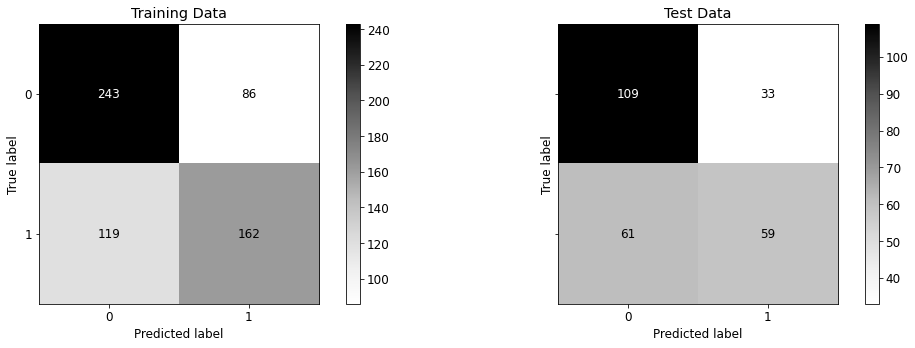

In [102]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,5))

#Plotting confusion matrix for training and test data
plot_confusion_matrix(model_clf,X_train,y_train,ax=a[0][0],cmap='Greys');
a[0][0].set_title('Training Data')

plot_confusion_matrix(model_clf,X_test,y_test,ax=a[0][1],cmap='Greys');
a[0][1].set_title('Test Data');
plt.tight_layout()  
plt.show()

**AUC and ROC curve for train and test set**

AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


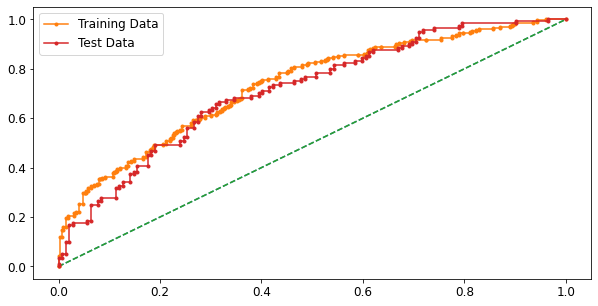

In [103]:
# AUC and ROC curve for the training data
plt.figure(figsize = (10,5))

# calculate AUC
LDA_train_auc = metrics.roc_auc_score(y_train,pred_prob_train_LDA[:,1])
print('AUC for the Training Data: %.3f' % LDA_train_auc)

#  calculate roc curve
LDA_train_fpr, LDA_train_tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_LDA[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC curve for the test data

# calculate AUC
LDA_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_LDA[:,1])
print('AUC for the Test Data: %.3f' % LDA_test_auc)

#  calculate roc curve
LDA_test_fpr, LDA_test_tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_LDA[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Comparison of models

**Critical Metrics**

In [104]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[LR_train_acc,LR_train_auc,LR_train_recall,LR_train_precision,LR_train_f1],
        'LR Test':[LR_test_acc,LR_test_auc,LR_test_recall,LR_test_precision,LR_test_f1],
       'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1]},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.67,0.65,0.66,0.64
AUC,0.74,0.72,0.73,0.71
Recall,0.58,0.52,0.58,0.49
Precision,0.66,0.65,0.65,0.64
F1 Score,0.62,0.58,0.61,0.56


**ROC Curve for train and test data**

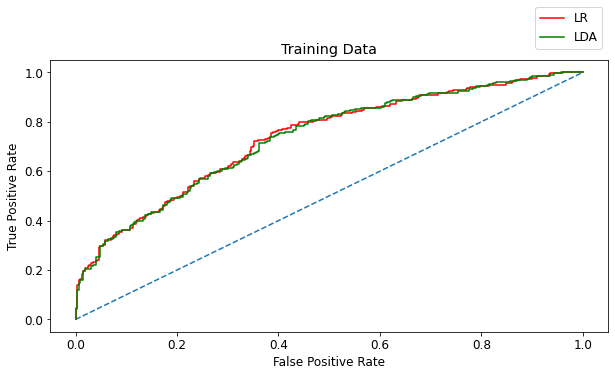

In [105]:
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_train_fpr, LR_train_tpr,color='red',label="LR")
plt.plot(LDA_train_fpr,LDA_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

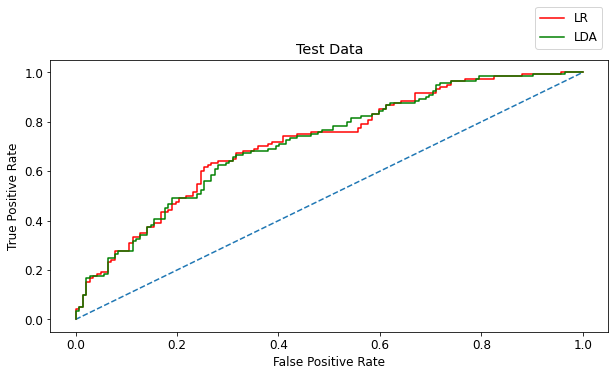

In [106]:
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_test_fpr, LR_test_tpr,color='red',label="LR")
plt.plot(LDA_test_fpr,LDA_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### Further Optimizing LDA Model by finding the best threshold

0.1 

Accuracy Score 0.482
F1 Score 0.6393 

Confusion Matrix


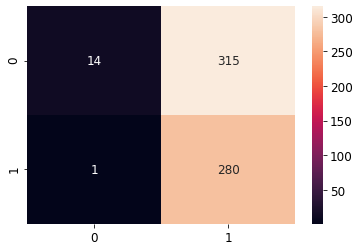

0.2 

Accuracy Score 0.5213
F1 Score 0.6499 

Confusion Matrix


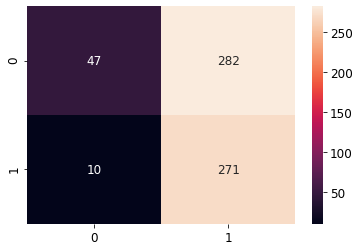

0.3 

Accuracy Score 0.5934
F1 Score 0.6693 

Confusion Matrix


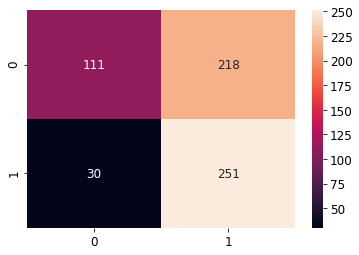

0.4 

Accuracy Score 0.6656
F1 Score 0.6762 

Confusion Matrix


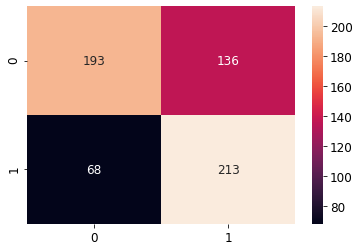

0.5 

Accuracy Score 0.6639
F1 Score 0.6125 

Confusion Matrix


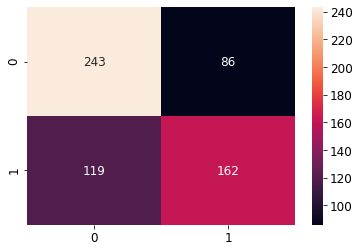

0.6 

Accuracy Score 0.659
F1 Score 0.5336 

Confusion Matrix


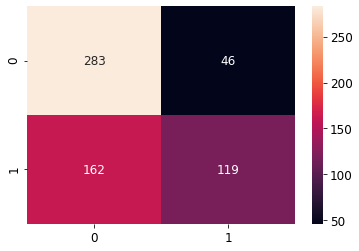

0.7 

Accuracy Score 0.6492
F1 Score 0.4398 

Confusion Matrix


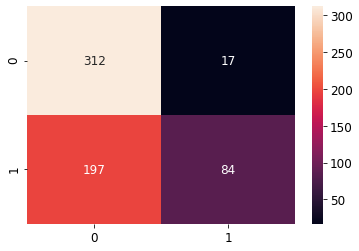

0.8 

Accuracy Score 0.5885
F1 Score 0.1981 

Confusion Matrix


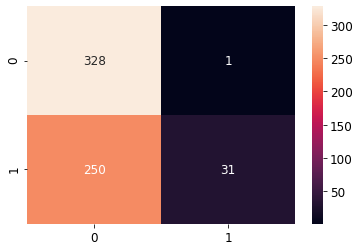

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


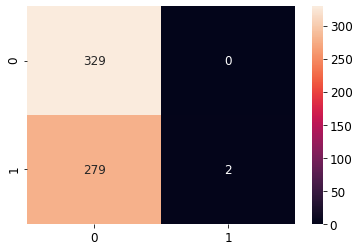

In [107]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train_LDA[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [108]:
pred_class_train_custom_cutoff=[]
for i in range(0,len(pred_prob_train_LDA[:,1])):
    if np.array(pred_prob_train_LDA[:,1])[i]>0.4:
        a=1
    else:
        a=0
    pred_class_train_custom_cutoff.append(a)
pred_class_train_custom_cutoff = np.array(pred_class_train_custom_cutoff)

In [109]:
pred_class_test_custom_cutoff=[]
for i in range(0,len(pred_prob_test_LDA[:,1])):
    if np.array(pred_prob_test_LDA[:,1])[i]>0.4:
        a=1
    else:
        a=0
    pred_class_test_custom_cutoff.append(a)
pred_class_test_custom_cutoff =np.array(pred_class_test_custom_cutoff)

### Further Optimizing Logistic Regression Model by finding the best threshold

0.1 

Accuracy Score 0.4852
F1 Score 0.6407 

Confusion Matrix


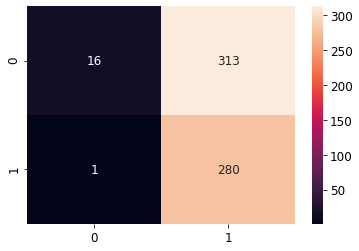

0.2 

Accuracy Score 0.518
F1 Score 0.6466 

Confusion Matrix


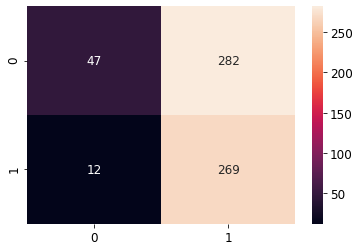

0.3 

Accuracy Score 0.5918
F1 Score 0.6684 

Confusion Matrix


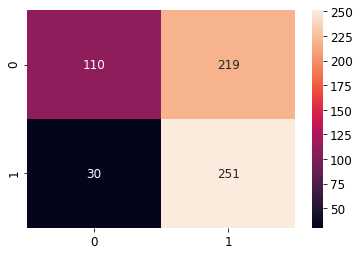

0.4 

Accuracy Score 0.6754
F1 Score 0.6847 

Confusion Matrix


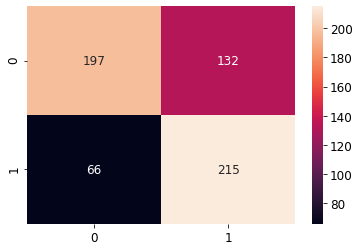

0.5 

Accuracy Score 0.6672
F1 Score 0.6163 

Confusion Matrix


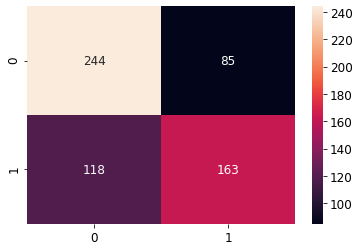

0.6 

Accuracy Score 0.659
F1 Score 0.5357 

Confusion Matrix


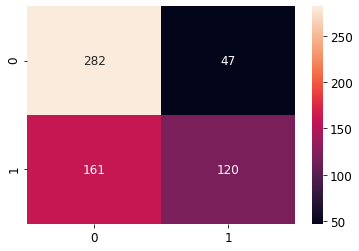

0.7 

Accuracy Score 0.6492
F1 Score 0.4339 

Confusion Matrix


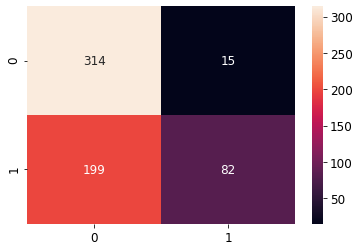

0.8 

Accuracy Score 0.5885
F1 Score 0.1981 

Confusion Matrix


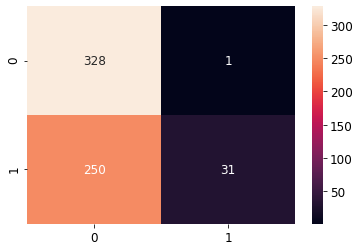

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


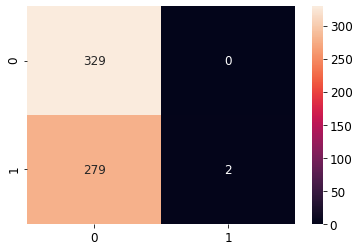

In [110]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data_LR=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train_grid[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data_LR.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data_LR),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data_LR),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data_LR),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [111]:
pred_class_train_custom_cutoff_LR=[]
for i in range(0,len(pred_prob_train_grid[:,1])):
    if np.array(pred_prob_train_grid[:,1])[i]>0.4:
        a=1
    else:
        a=0
    pred_class_train_custom_cutoff_LR.append(a)
pred_class_train_custom_cutoff_LR =np.array(pred_class_train_custom_cutoff_LR)

In [112]:
pred_class_test_custom_cutoff_LR=[]
for i in range(0,len(pred_prob_test_grid[:,1])):
    if np.array(pred_prob_test_grid[:,1])[i]>0.4:
        a=1
    else:
        a=0
    pred_class_test_custom_cutoff_LR.append(a)
pred_class_test_custom_cutoff_LR =np.array(pred_class_test_custom_cutoff_LR)

### Model Evaluation for Optimized Logistic Regression Model
**Classification Report for train and test set**

In [113]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train_custom_cutoff_LR
),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test_custom_cutoff_LR),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.60      0.67       329
           1       0.62      0.77      0.68       281

    accuracy                           0.68       610
   macro avg       0.68      0.68      0.68       610
weighted avg       0.69      0.68      0.67       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.72      0.56      0.63       142
           1       0.59      0.75      0.66       120

    accuracy                           0.65       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.65      0.64       262
 



**Confusion matrix for train and test set**

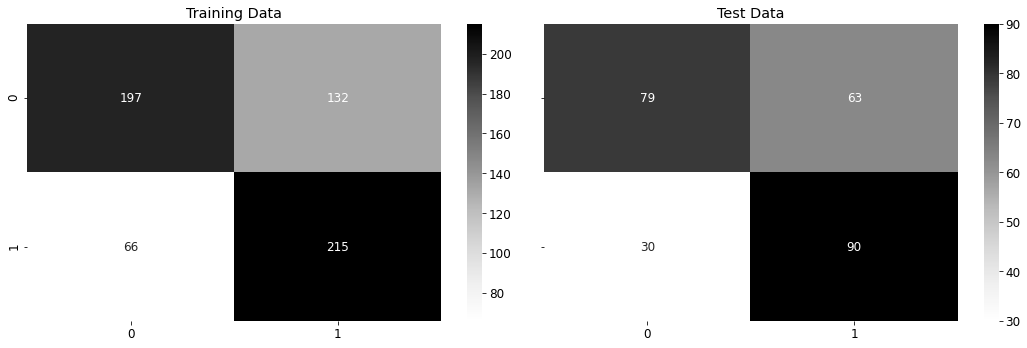

In [114]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,5))
#Plotting confusion matrix for training and test data

sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train_custom_cutoff_LR)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
# plot_confusion_matrix(model,X_train,y_train,cmap='Greys');
a[0][0].set_title('Training Data')

sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test_custom_cutoff_LR)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
# plot_confusion_matrix(model,X_test,y_test,ax=a[0][1],cmap='Greys');
a[0][1].set_title('Test Data');
plt.tight_layout()  
plt.show()

### Model Evaluation for Optimized LDA Model
**Classification Report for train and test set**

In [115]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train_custom_cutoff
),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test_custom_cutoff),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.59      0.65       329
           1       0.61      0.76      0.68       281

    accuracy                           0.67       610
   macro avg       0.67      0.67      0.67       610
weighted avg       0.68      0.67      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.71      0.58      0.64       142
           1       0.59      0.72      0.65       120

    accuracy                           0.65       262
   macro avg       0.65      0.65      0.64       262
weighted avg       0.66      0.65      0.64       262
 



**Confusion matrix for train and test set**

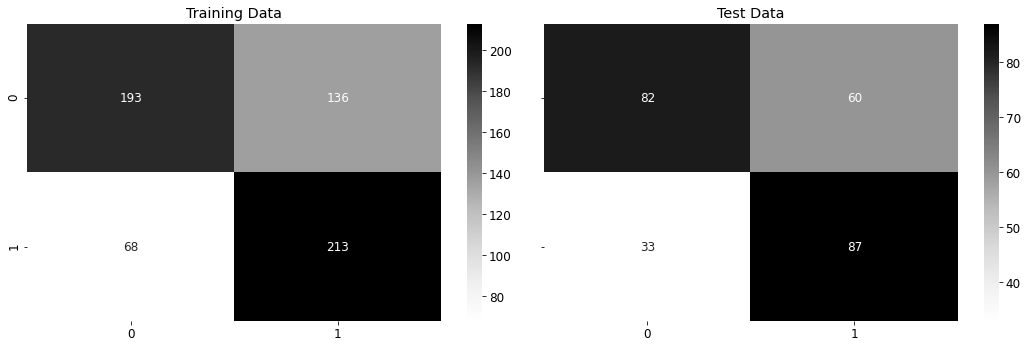

In [116]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,5))
#Plotting confusion matrix for training and test data

sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
# plot_confusion_matrix(model,X_train,y_train,cmap='Greys');
a[0][0].set_title('Training Data')

sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
# plot_confusion_matrix(model,X_test,y_test,ax=a[0][1],cmap='Greys');
a[0][1].set_title('Test Data');
plt.tight_layout()  
plt.show()

### Feature Importance

In [117]:
from sklearn.feature_selection import RFE
predictors = X_train
selector = RFE(best_model, n_features_to_select = 1)
selector = selector.fit(predictors, y_train)

In [118]:
order = selector.ranking_
order

array([6, 4, 5, 2, 3, 1])

In [119]:
feature_ranking = []
for i in order:
    feature_ranking.append(f"{i}.{tour.columns[i]}")

In [120]:
feature_ranking

['6.foreign_yes',
 '4.no_young_children',
 '5.no_older_children',
 '2.age',
 '3.educ',
 '1.Salary']

In [121]:
importance = best_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.00002
Feature: 1, Score: -0.05707
Feature: 2, Score: 0.06035
Feature: 3, Score: -1.34883
Feature: 4, Score: -0.04894
Feature: 5, Score: 1.26648


In [122]:
X.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'foreign_yes'],
      dtype='object')